In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_file = pd.ExcelFile('ECT.xlsx')

In [18]:
PartyList = data_file.parse(sheet_name='result_constituencies_PartyList', header=0)
Candidate = data_file.parse(sheet_name='result_constituencies_Candidate', header=0, usecols=[0,2,3,4,5])
constituency = data_file.parse(sheet_name='info_constituency',header=0)

In [19]:
#Candidate['cons_id'].value_counts()
#PartyList['cons_id'].value_counts()

In [20]:
result_All = pd.merge(PartyList,Candidate, on=('cons_id','party_id'), how='outer')
#print(result_All['cons_id'].value_counts()[result_All['cons_id'].value_counts()>67])

In [21]:
unique_result = [list(set( result_All[result_All['cons_id']=='CMI_7']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_7']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='NMA_1']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='NMA_1']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='PNB_4']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='PNB_4']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='CMI_6']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_6']['party_id']))[0]]

In [22]:
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[1]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[2]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[3]])

In [23]:
#print(result_All[result_All['party_list_vote_percent']>99])
result_All = result_All.drop(result_All.index[result_All['cons_id']=='NST_6'])

In [24]:
#print(result_All[result_All['mp_app_vote_percent']>99])

In [25]:
for_check_vote = result_All[['cons_id','party_list_vote','mp_app_vote']]
for_check_vote.head


<bound method NDFrame.head of       cons_id  party_list_vote  mp_app_vote
0       ACR_1           4550.0      15926.0
1       ACR_1            185.0          NaN
2       ACR_1             67.0          NaN
3       ACR_1          33576.0      21388.0
4       ACR_1            132.0        459.0
...       ...              ...          ...
26795   YST_3            145.0          NaN
26796   YST_3            412.0          NaN
26797   YST_3             17.0          NaN
26798   YST_3            138.0          NaN
26799   YST_3             85.0          NaN

[26733 rows x 3 columns]>

In [26]:
check_vote = for_check_vote.groupby('cons_id')
vote = check_vote.sum()
new_column_names = {'party_list_vote': 'party_list_vote_turn_out', 'mp_app_vote': 'mp_app_vote_turn_out'}
vote = vote.rename(columns = new_column_names)
vote

,party_list_vote_turn_out,mp_app_vote_turn_out
cons_id,,
ACR_1,101353.0,100946.0
ACR_2,106956.0,106888.0
ATG_1,84919.0,84454.0
ATG_2,83512.0,83268.0
AYA_1,104364.0,102821.0
...,...,...
YLA_2,92745.0,93349.0
YLA_3,91342.0,90913.0
YST_1,106512.0,106293.0


In [27]:
result_All = pd.merge(result_All, vote, on='cons_id', how='left')

In [28]:
def calculate_new_vote_percent(row):
    return (row['party_list_vote'] / row['party_list_vote_turn_out'])*100

result_All['new_party_list_vote_percent'] = result_All.apply(calculate_new_vote_percent,axis=1)

In [29]:
def calculate_new_mp_app_vote(row):
    return (row['mp_app_vote'] / row['mp_app_vote_turn_out'])*100

result_All['new_mp_app_vote_percent'] = result_All.apply(calculate_new_mp_app_vote,axis=1)

In [30]:
result_mp = result_All[result_All['mp_app_rank']<=5]
result_mp = result_mp.drop('party_id', axis=1)
result_mp = result_mp.drop('mp_app_vote', axis=1)
#sns.pairplot(result_mp,hue='mp_app_rank')

In [31]:
result_mp.loc[result_mp['mp_app_rank'] >= 3, 'mp_app_rank'] =0
result_mp =  result_All[result_All['cons_id']=='ACR_1']
result_mp.head()

,cons_id,party_id,party_list_vote,party_list_vote_percent,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_list_vote_turn_out,mp_app_vote_turn_out,new_party_list_vote_percent,new_mp_app_vote_percent
0,ACR_1,701,4550.0,4.30977,4.0,15926.0,15.08515,101353.0,100946.0,4.489260,15.776752
1,ACR_1,702,185.0,0.17523,NaN,NaN,NaN,101353.0,100946.0,0.182530,NaN
2,ACR_1,703,67.0,0.06346,NaN,NaN,NaN,101353.0,100946.0,0.066106,NaN
3,ACR_1,705,33576.0,31.80328,2.0,21388.0,20.25878,101353.0,100946.0,33.127781,21.187566
4,ACR_1,706,132.0,0.12503,9.0,459.0,0.43477,101353.0,100946.0,0.130238,0.454699


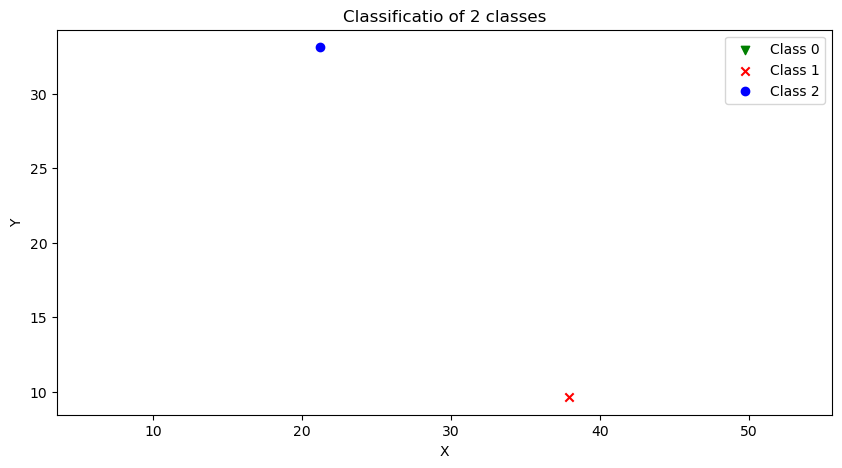

In [32]:
group0 = result_mp[result_mp['mp_app_rank']==0]
group1 = result_mp[result_mp['mp_app_rank']==1]
group2 = result_mp[result_mp['mp_app_rank']==2]
group3 = result_mp[result_mp['mp_app_rank']==3]

plt.figure(figsize=(10,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['new_mp_app_vote_percent'],group0['new_party_list_vote_percent'],marker='v',c='g',label='Class 0')
plt.scatter(group1['new_mp_app_vote_percent'],group1['new_party_list_vote_percent'],marker='x',c='r',label='Class 1')
plt.scatter(group2['new_mp_app_vote_percent'],group2['new_party_list_vote_percent'],marker='o',c='b',label='Class 2')
#plt.scatter(group3['new_mp_app_vote_percent'],group3['new_party_list_vote_percent'],marker='p',c='y',label='Class ')

plt.legend(loc='upper right')
plt.show()

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x = result_mp[['new_mp_app_vote_percent','new_party_list_vote_percent']].values
y = result_mp['mp_app_rank'].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 1)

In [178]:
#print("X_train shape", x_train.shape)
#print("y_train shape", y_train.shape)
#print("X_test shape", x_test.shape)
#print("y_test shape", y_test.shape)

In [219]:
#Build linear regression model
model_logistic = LogisticRegression(multi_class='ovr', solver='liblinear',penalty='l2')
model_logistic.fit(x_train,y_train)
# = theta0 + theta1*x _theta2*y
print("Theta0 all: ",model_logistic.intercept_)
print("Theta1 all: ",model_logistic.coef_)
print("Theta2 all: ",model_logistic.coef_)

Theta0 all:  [ 4.19600467 -5.62257221 -2.19327334]
Theta1 all:  [[-12.97567341  -0.80836398]
 [ 11.18958961   0.75350794]
 [  2.17492618   0.4298418 ]]
Theta2 all:  [[-12.97567341  -0.80836398]
 [ 11.18958961   0.75350794]
 [  2.17492618   0.4298418 ]]


In [180]:
# = theta0 + theta1*x _theta2*y
#print("Theta0: ",model_logistic.intercept_[0])
#print("Theta1: ",model_logistic.coef_[0][0])
#print("Theta2: ",model_logistic.coef_[0][1])
#print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[0],model_logistic.coef_[0][0],model_logistic.coef_[0][1]))

In [181]:
#print("Theta0: ",model_logistic.intercept_[1])
#print("Theta1: ",model_logistic.coef_[1][0])
#print("Theta2: ",model_logistic.coef_[1][1])
#print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[1],model_logistic.coef_[1][0],model_logistic.coef_[1][1]))

In [182]:
#print("Theta0: ",model_logistic.intercept_[2])
#print("Theta1: ",model_logistic.coef_[2][0])
#print("Theta2: ",model_logistic.coef_[2][1])
#print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[2],model_logistic.coef_[2][0],model_logistic.coef_[2][1]))

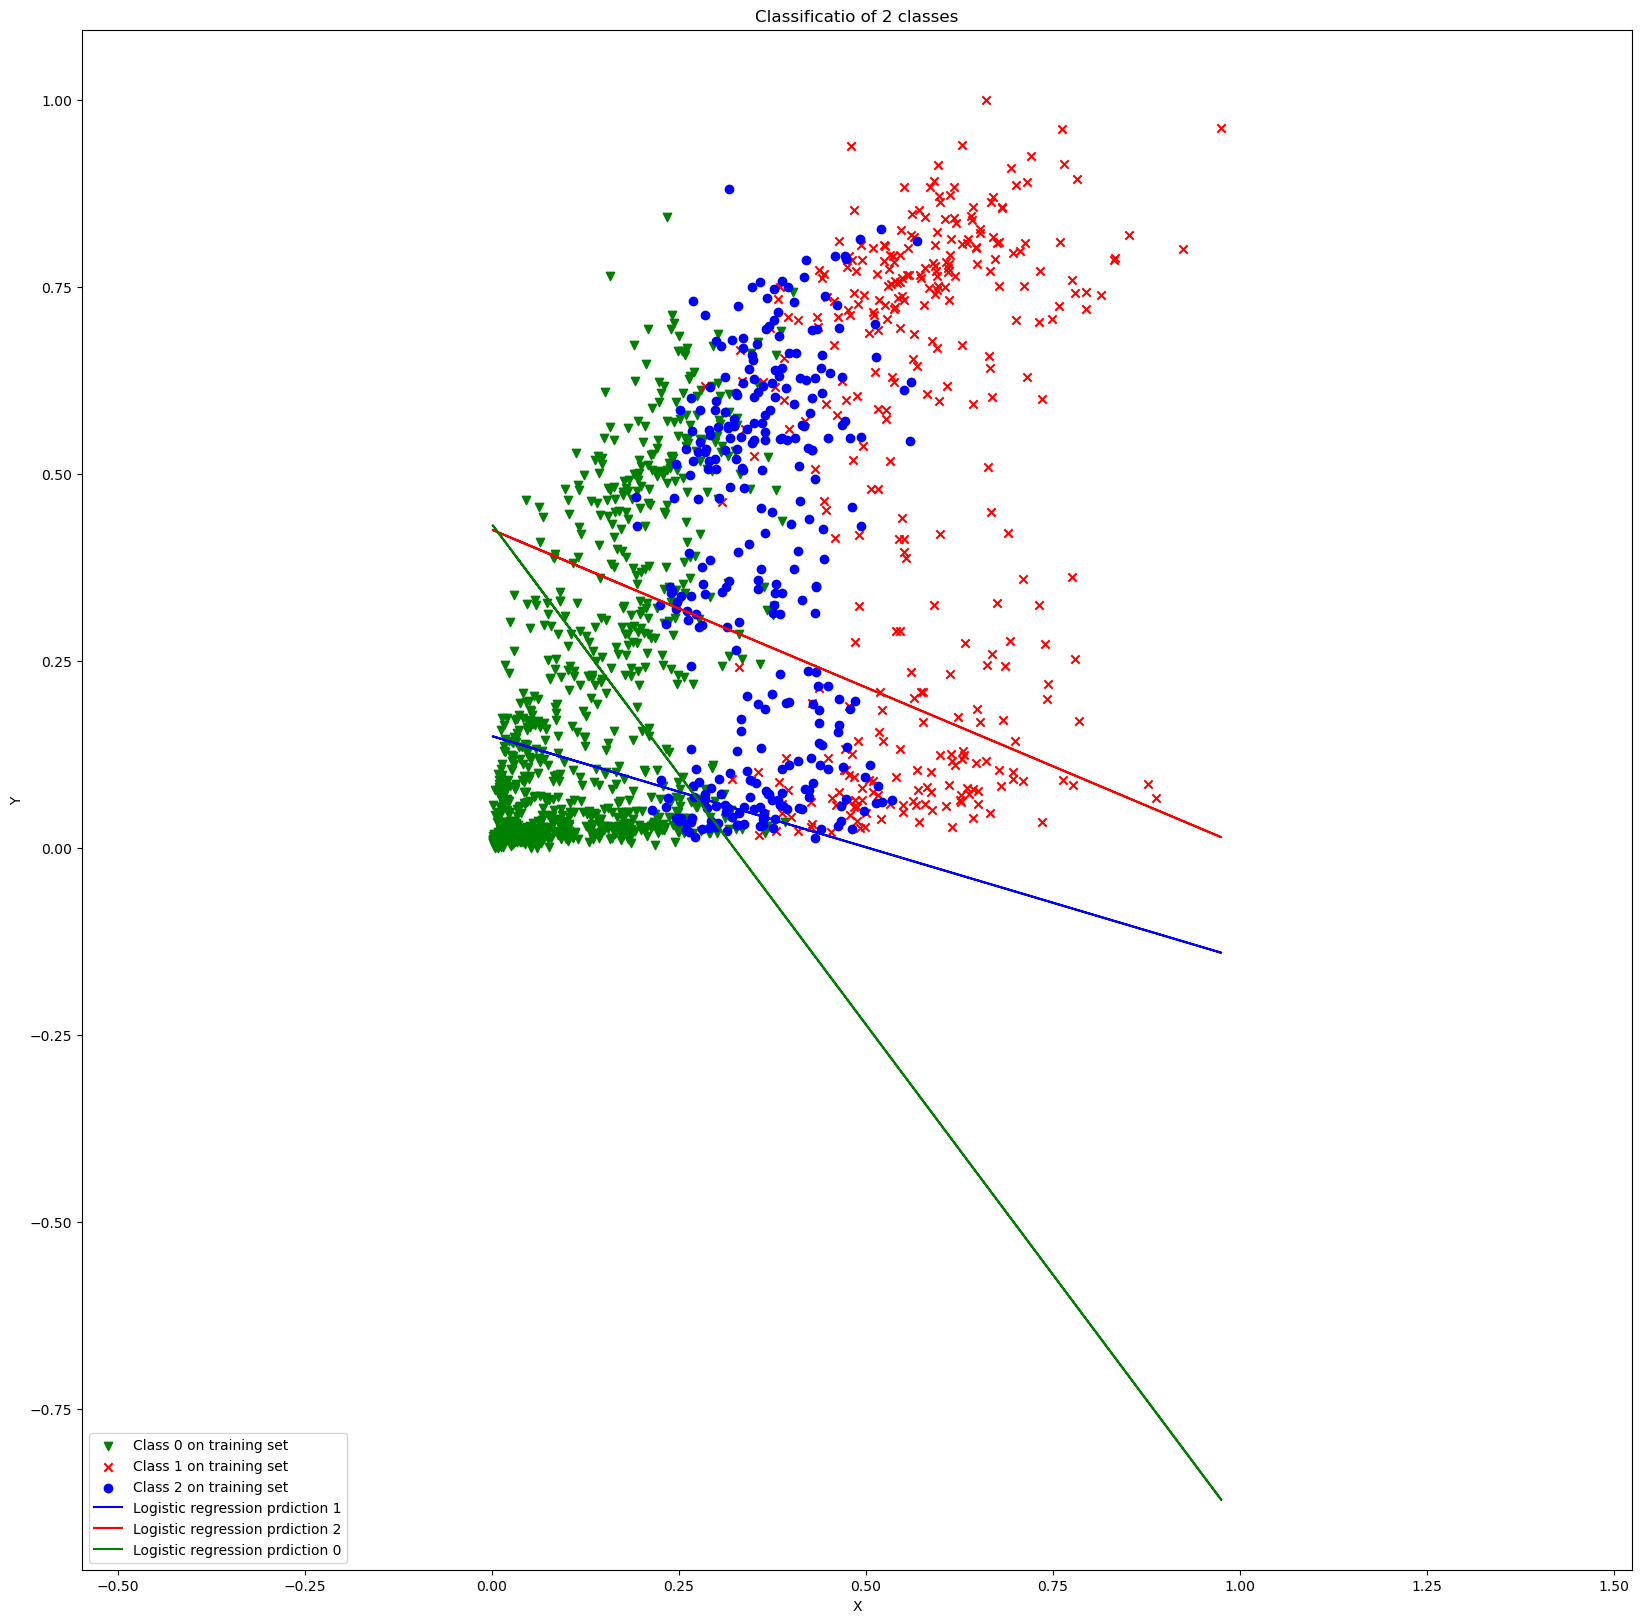

In [220]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group2 = df_training[df_training['Label']==2]
#group3 = df_training[df_training['Label']==3]

plt.figure(figsize=(20,20))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.scatter(group2['X'],group2['Y'],marker='o',c='b',label='Class 2 on training set')
#plt.scatter(group3['X'],group3['Y'],marker='p',c='y',label='Class 3 on training set')

G0 = ((model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]))/12
G1 = ((model_logistic.intercept_[1]+model_logistic.coef_[1][0]*df_training['X'].values)/((-1)*model_logistic.coef_[1][1]))/50
G2 = ((model_logistic.intercept_[2]+model_logistic.coef_[2][0]*df_training['X'].values)/((-1)*model_logistic.coef_[2][1]))/12

plt.plot(df_training['X'].values,G1,'-b',label="Logistic regression prdiction 1")
plt.plot(df_training['X'].values,G2,'-r',label="Logistic regression prdiction 2")
#plt.plot(df_training['X'].values,G3,'-y',label="Logistic regression prdiction 3")
plt.plot(df_training['X'].values,G0,'-g',label="Logistic regression prdiction 0")

plt.legend(loc="lower left")
plt.show()

In [211]:
y_pred = model_logistic.predict(x_train)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1430
         1.0       0.90      0.78      0.84       364

    accuracy                           0.94      1794
   macro avg       0.92      0.88      0.90      1794
weighted avg       0.94      0.94      0.94      1794

Confusion matrix 
[[1399   31]
 [  80  284]]


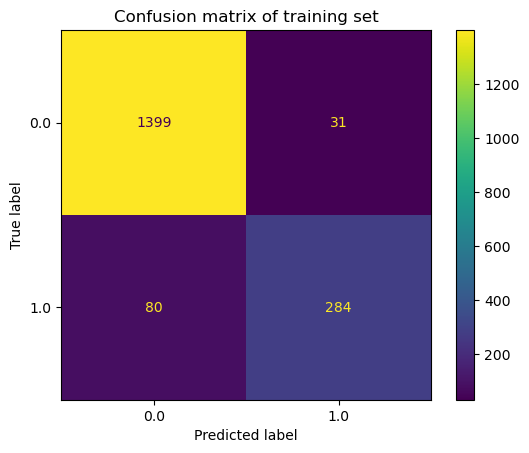

In [26]:
# Plot confusion matrix of training set
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

In [2]:
y_pred = model_logistic.predict(x_test)
y_pred

NameError: name 'model_logistic' is not defined

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       165
         1.0       0.91      0.83      0.87        35

    accuracy                           0.95       200
   macro avg       0.94      0.91      0.92       200
weighted avg       0.95      0.95      0.95       200

Confusion matrix 
[[162   3]
 [  6  29]]


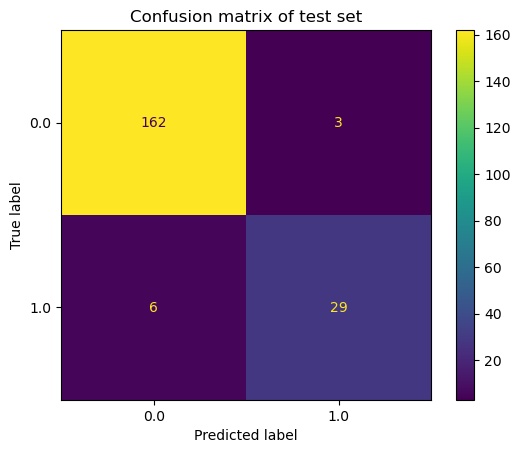

In [43]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of test set')
plt.show()